__Summary__

Analyze local and global temperature data and compare the temperature trends of my home town __Berlin__ to overall global temperature trends.


# Step 1 : Extract the data from the database. 

__Tool used:__ SQL

## Find out which __German__ cities are available in the *city_list* table

SQL query:

 ```
 SELECT * 
     	FROM city_list 
        WHERE country = 'Germany' 
 ```

__Result:__ Berlin, Hamburg and Munich 

## Extract the city level data for Berlin from *city_data*

SQL query:

```
SELECT * 
	FROM city_data 
	WHERE country = 'Germany' AND city='Berlin'
```

__Result:__ The result table contains 271 results with the average temperature for Berlin from 1743 to 2013. There are missing values from 1746 to 1749.  

## Extract the global data from *global_data*

SQL query:

```
SELECT * 
	FROM global_data
    ```

__Result:__ The result table contains 266 results with the global average temperature from 1750 up to 2015. 

## Join the 2 resulting tables - Berlin and Global data.

The resulting tables show that there is available data for different time periods. 
Since the purpose is to compare __yearly__ temperature data, the 2 tables will be joined by means of INNER JOIN, so that the resulting table contains only raws, where data both for Berlin and global average temperature for a certain year is available. By chance, in this way are also getting rid of the missing values for Berlin. 


```
SELECT
    c.year, c.avg_temp as BerlinAvgTemp, g.avg_temp as GlobalAvgTemp  
    FROM city_data c
    INNER JOIN
    global_data g
    ON c.year=g.year
    WHERE country = 'Germany' AND city='Berlin'
    ```

Result: 264 results from 1750 to 2013.
The resulting table is exported to CSV. 


# Step 2: Open up the CSV

Tool: __Python and Jupyter Notebook__

For the purposes of data visualisation is used Python. The CSV file is imported as DataFrame. 

In [4]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Assign filename: file
# AvgTemp export .CSV file 
file = 'results.csv'

# Import the file as DataFrame: df
df = pd.read_csv(file, sep=',')

# Print some Exploratory data analysis
df.head()

,year,berlinavgtemp,globalavgtemp
0,1750,9.83,8.72
1,1751,9.75,7.98
2,1752,4.84,5.78
3,1753,8.72,8.39
4,1754,8.49,8.47


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
year             264 non-null int64
berlinavgtemp    264 non-null float64
globalavgtemp    264 non-null float64
dtypes: float64(2), int64(1)
memory usage: 6.3 KB


In [8]:
df.describe()

,year,berlinavgtemp,globalavgtemp
count,264.000000,264.000000,264.000000
mean,1881.500000,8.917727,8.359394
std,76.354437,0.883601,0.575184
min,1750.000000,4.840000,5.780000
25%,1815.750000,8.357500,8.077500
50%,1881.500000,8.935000,8.365000
75%,1947.250000,9.485000,8.700000
max,2013.000000,10.960000,9.730000


# Step 3:  Create a line chart 
that compares Berlin temperatures with the global temperatures. 

At first the yearly averages are plotted.    

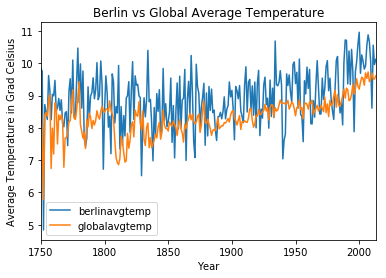

In [6]:
# Generate a line plot
df.plot(x='year', y=['berlinavgtemp','globalavgtemp'])

# Add a title
plt.title('Berlin vs Global Average Temperature')

# Specify the x-axis label
plt.xlabel('Year')

# Specify the y-axis label
plt.ylabel('Average Temperature in Grad Celsius')

# Display the plot
plt.show() 

## Moving averages calculation

The graphic above is pretty noisy and makes the comparison difficult. 
Moving averages are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. Hence it is preferable to use moving averages for the average temperature comparison. 

For the calculation of the moving average temperatures is used the python *.rolling* function with a 10 year window. 

In [8]:
# Use a rolling 10-year window to smooth the yearly average temperatures  
df['berlinrolling'] = df['berlinavgtemp'].rolling(window=10).mean()
df['globalrolling'] = df['globalavgtemp'].rolling(window=10).mean()
print(df.head(15))

    year  berlinavgtemp  globalavgtemp  berlinrolling  globalrolling
0   1750           9.83           8.72            NaN            NaN
1   1751           9.75           7.98            NaN            NaN
2   1752           4.84           5.78            NaN            NaN
3   1753           8.72           8.39            NaN            NaN
4   1754           8.49           8.47            NaN            NaN
5   1755           8.26           8.36            NaN            NaN
6   1756           9.62           8.85            NaN            NaN
7   1757           9.15           9.02            NaN            NaN
8   1758           8.25           6.74            NaN            NaN
9   1759           9.04           7.99          8.595          8.030
10  1760           8.99           7.19          8.511          7.877
11  1761           9.47           8.77          8.483          7.956
12  1762           8.53           8.61          8.852          8.239
13  1763           8.62           

## Line Chart 

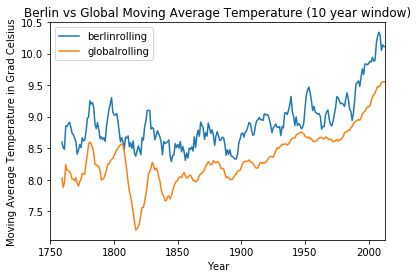

In [9]:
# Generate a line plot
df.plot(x='year', y=['berlinrolling','globalrolling'])

# Add a title
plt.title('Berlin vs Global Moving Average Temperature (10 year window)')

# Specify the x-axis label
plt.xlabel('Year')

# Specify the y-axis label
plt.ylabel('Moving Average Temperature in Grad Celsius')

# Display the plot
plt.show()

# Step 4: Observations

### Similarities
The graphic shows clearly, that both averages are __moving alongside__, meaning when the world average temperature drops, so does the temperature in Berlin. The city of Berlin is following the global trends.

### Differencies
As expected, generally the global averages show a __smoother line__, apart from several big ups and downs, since it accumulates data on a larger scale.  

Berlin has been on average __consistently warmer__ compared with the global temperatures.  

### Trends
Both locally and globally a clear and consistent __upward tendency__ is observed in the last few hundred years. The world is getting hotter and hotter!   
 


# Step 5: More visualisations


### Box plot 

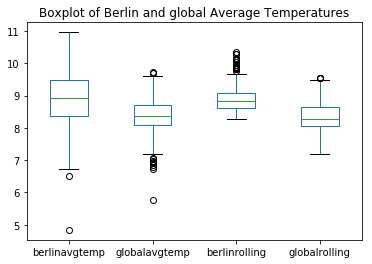

In [85]:
#Select the columnsn to plot
data= df[['berlinavgtemp','globalavgtemp','berlinrolling','globalrolling']]
# Create and show a boxplot
data.plot(kind='box')
# Add a title
plt.title('Boxplot of Berlin and global Average Temperatures')
plt.show()

### Scatterplots

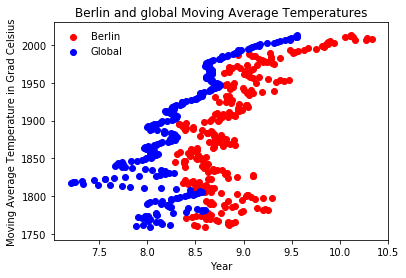

In [10]:
# Create Scatterplot 
plt.scatter(df['berlinrolling'], df['year'], color='red', label="Berlin")
plt.scatter(df['globalrolling'], df['year'], color='blue', label="Global")
# Add a title
plt.title('Berlin and global Moving Average Temperatures')
# Specify the x-axis label
plt.xlabel('Year')
# Specify the y-axis label
plt.ylabel('Moving Average Temperature in Grad Celsius')
#Show legend
plt.legend(frameon=False, loc='best')
plt.show()


The above scatterplot shows very clearly how the temperatures in Berlin are moving along with the global temperatures, only they are higher (the points for Berlin are to the right of those for the global temperatures).


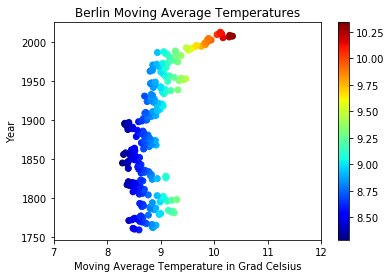

In [12]:
import matplotlib.cm as cm
#fig, (ax1, ax2) = plt.subplots(1, 2)
plt.scatter(df['berlinrolling'], df['year'], c=df['berlinrolling'], cmap=cm.jet)
plt.xlim(7, 12) 
plt.colorbar()
# Add a title
plt.title('Berlin Moving Average Temperatures')
# Specify the y-axis label
plt.ylabel('Year')
# Specify the x-axis label
plt.xlabel('Moving Average Temperature in Grad Celsius')
plt.show()

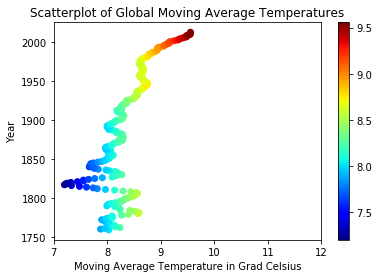

In [13]:
plt.scatter(df['globalrolling'], df['year'], c=df['globalrolling'], cmap=cm.jet)
plt.xlim(7, 12)
plt.colorbar()
# Add a title
plt.title('Scatterplot of Global Moving Average Temperatures')
# Specify the y-axis label
plt.ylabel('Year')
# Specify the x-axis label
plt.xlabel('Moving Average Temperature in Grad Celsius')
plt.show() 

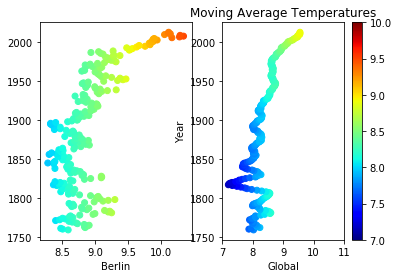

In [138]:
import matplotlib.cm as cm
#Create Scatterplot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(df['berlinrolling'], df['year'], c=df['berlinrolling'], cmap=cm.jet, norm=norm)
ax2.scatter(df['globalrolling'], df['year'], c=df['globalrolling'], cmap=cm.jet, norm=norm)
#Colorbar
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(range(7,11))
plt.colorbar(m)
# Add a title
plt.title('Moving Average Temperatures in Grad Celsius')
# Specify the y-axis label
plt.ylabel('Year')
# Specify the x-axis label
ax1.set_xlabel("Berlin")
ax2.set_xlabel("Global")
plt.xlim(7, 11) 
#Normalize
norm=plt.Normalize(7,11)
plt.show()

The above scatterplot visualises once again in color how the temeratures in Berlin reach warmer colors on the colorbar scale, compared to the global temperatures. 

# Step 6: Check correlation

#### Correlation between Berlin and Global average temperatures

In [168]:
print(np.corrcoef(df['berlinavgtemp'],df['globalavgtemp']))

[[1.         0.51594642]
 [0.51594642 1.        ]]


0.52 is a relatively strong (moderate) positive correlation

#### Correlation between Berlin and Global rolling average temperatures

In [169]:
print(np.corrcoef(df.berlinrolling[9:],df.globalrolling[9:]))

[[1.         0.85761646]
 [0.85761646 1.        ]]


0.85761646 is a strong positive correlation

               berlinavgtemp  globalavgtemp
berlinavgtemp       1.000000       0.515946
globalavgtemp       0.515946       1.000000


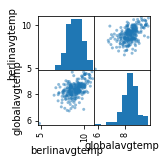

In [198]:

df2 = df[['berlinavgtemp','globalavgtemp']]
print(df2.corr())
 
pd.plotting.scatter_matrix(df2, figsize=(2,2))
plt.show()
 